<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Audio-ML/blob/main/Audio_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing audio data for deep learning

## 0. Prerequirities

In [ ]:
import librosa , librosa.display
import numpy as np
import matplotlib.pyplot as plt

## 1. Displaying Different aspects of sample music data

*   Waveform
*   Power Spectrum (Fourier Transform absolute value)
*   Spectrogram
*   Spectrogram (in dB)
*   MFCCs

> Fourier transform angle is not usefull and is not necessery for plotting


### 1.0 Downloading sample music

In [ ]:
!wget "https://github.com/musikalkemist/DeepLearningForAudioWithPython/raw/master/11-%20Preprocessing%20audio%20data%20for%20deep%20learning/code/blues.00000.wav"

--2024-07-18 09:41:41--  https://github.com/musikalkemist/DeepLearningForAudioWithPython/raw/master/11-%20Preprocessing%20audio%20data%20for%20deep%20learning/code/blues.00000.wav
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/musikalkemist/DeepLearningForAudioWithPython/master/11-%20Preprocessing%20audio%20data%20for%20deep%20learning/code/blues.00000.wav [following]
--2024-07-18 09:41:41--  https://raw.githubusercontent.com/musikalkemist/DeepLearningForAudioWithPython/master/11-%20Preprocessing%20audio%20data%20for%20deep%20learning/code/blues.00000.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

In [ ]:
from IPython.display import display , Audio
display(Audio("blues.00000.wav",autoplay=True))

In [ ]:
# setting Global variables
FILE_NAME = "blues.00000.wav"
FIG_SIZE = (15 , 10)

### 1.1 Waveform

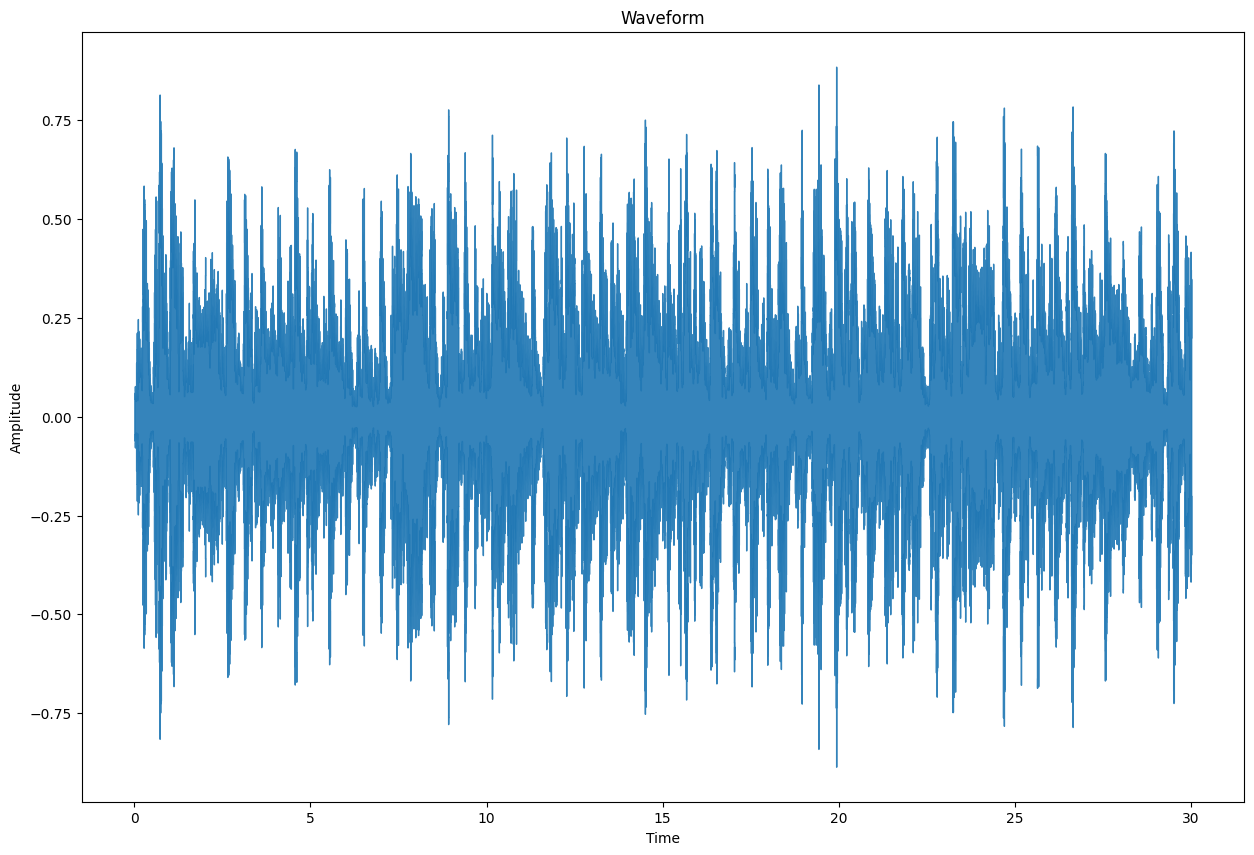

In [ ]:
## WAVEFORM

# loading sound data
signal , sample_rate = librosa.load(FILE_NAME , sr = 22050)

# plotting sound signal shape
plt.figure(figsize = FIG_SIZE) ;
librosa.display.waveshow(signal , alpha = 0.9)
plt.xlabel("Time") ;
plt.ylabel("Amplitude") ;
plt.title("Waveform") ;


### 1.2 Power Spectrum

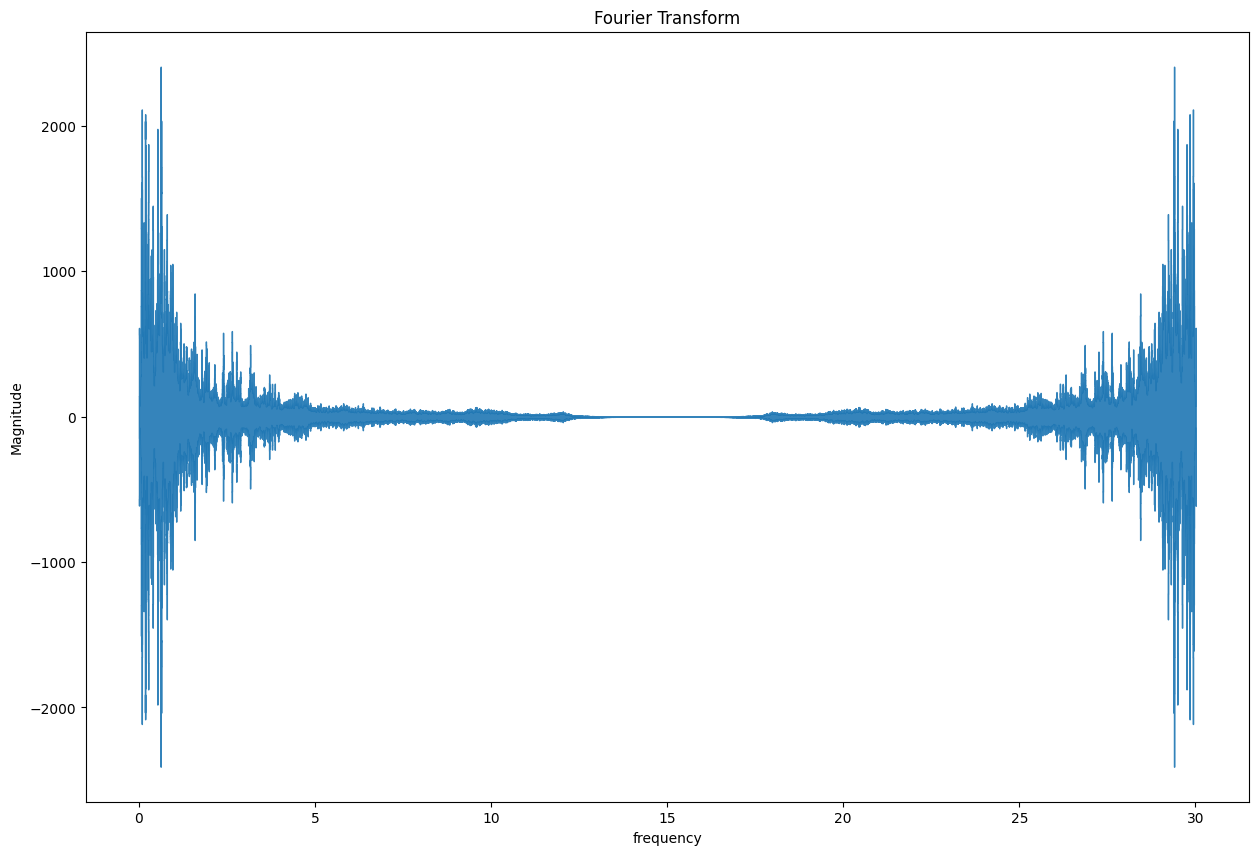

In [ ]:
## POWER SPECTRUM
# producing fourier transform of signal
fft = np.fft.fft(signal)
fft_mag = np.abs(fft) # finding abstract of fourier transform as magnitude of signal fourier transform or power of signal

# ploting fourier transform of signal
plt.figure(figsize = FIG_SIZE) ;
librosa.display.waveshow(fft_mag , alpha = 0.9) ;
plt.xlabel("frequency") ;
plt.ylabel("Magnitude") ;
plt.title("Fourier Transform") ;
plt.show()

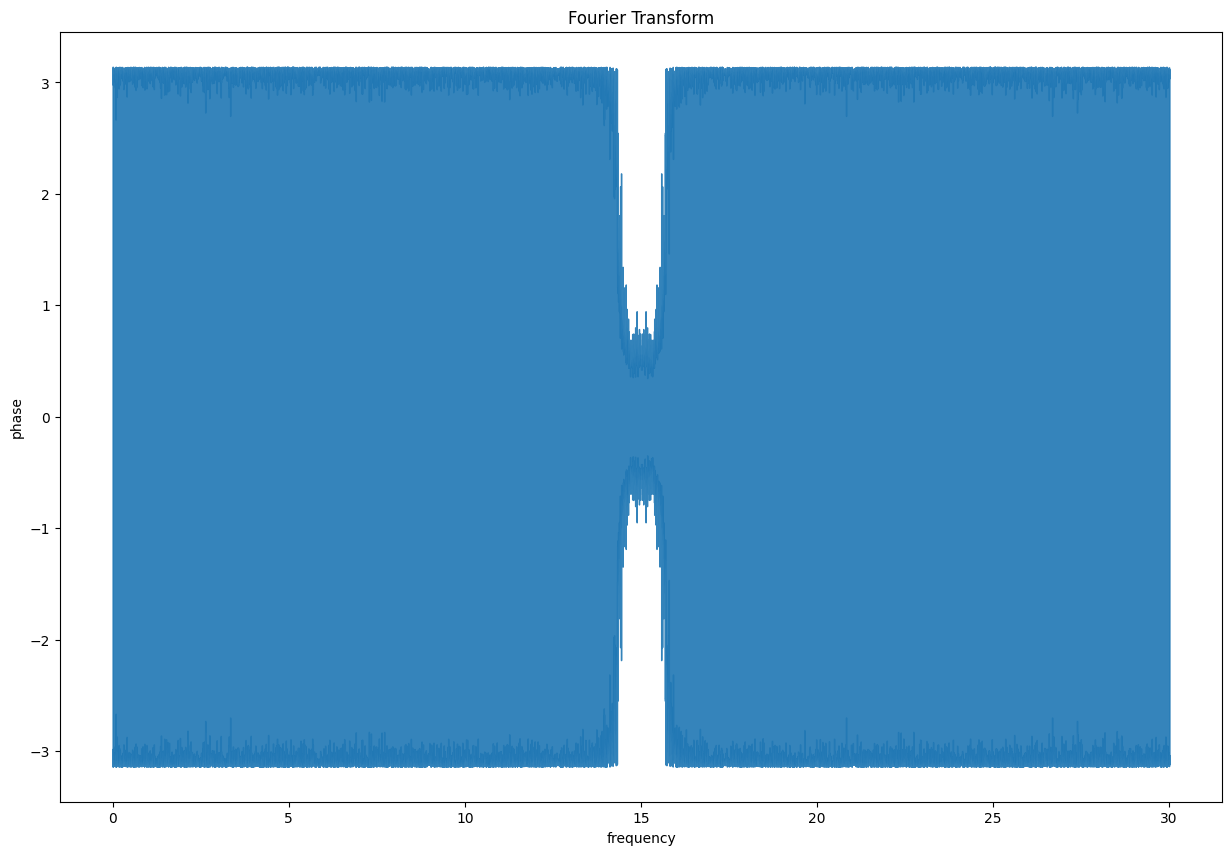

In [ ]:
# As the phase of signal is less important for us we usualy ignores it
fft_phase  = np.angle(fft)
plt.figure(figsize = FIG_SIZE ) ;
librosa.display.waveshow(fft_phase , alpha = 0.9) ;
plt.xlabel("frequency") ;
plt.ylabel("phase") ;
plt.title("Fourier Transform") ;
plt.show()

❗  **Note :**

as you could see it's not realy beautifull and doesn't have any application for us

### 1.3 Spectrogram

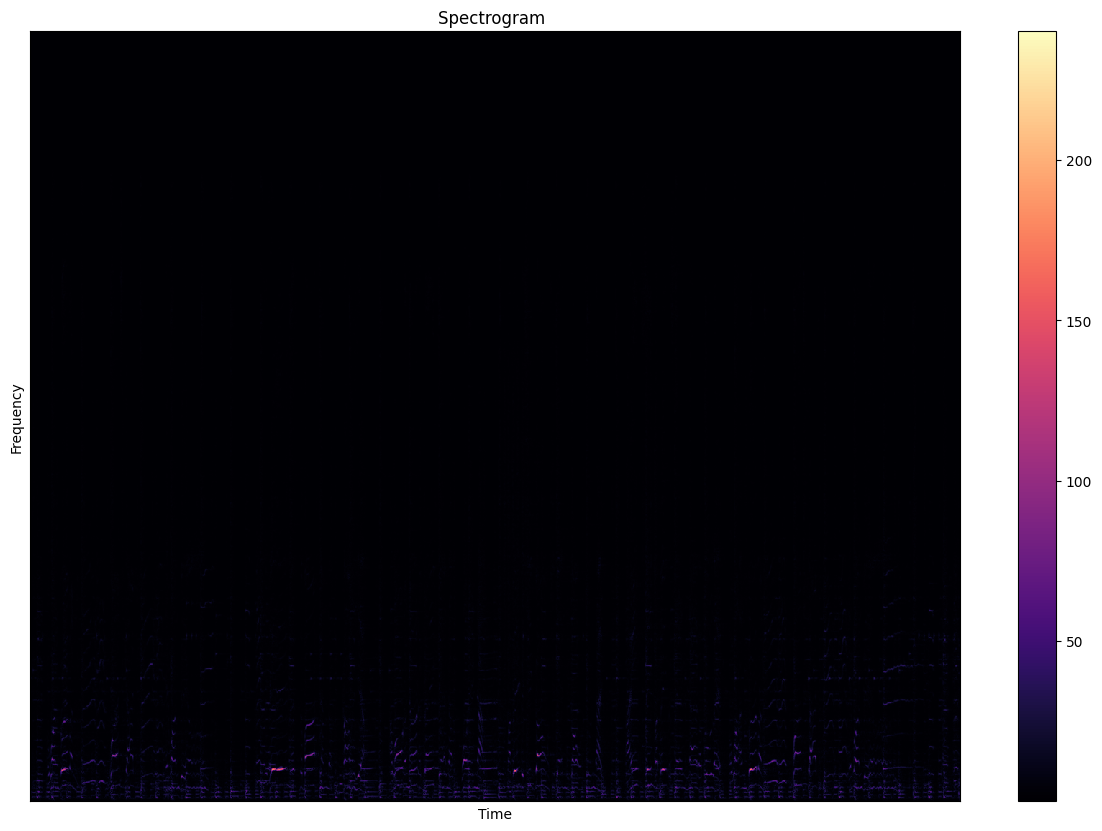

In [ ]:
# Spectrogram as STFT (Short-Time Fourier Transform)

hop_length = 512 # Still didn't know how it works
n_fft = 2048 # still didn't know how it works

# Implementing stft on signal & Performing spectrogram as stft
stft = librosa.stft(signal , hop_length=hop_length , n_fft=n_fft)
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram , sr = sample_rate , hop_length = hop_length) # specshow is used for displaying spectrogram
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram ") ;

❗ **Note :**

STFT is an extension of FFT that computes the Fourier Transform of short, overlapping segments of a signal over time. From

🈺 **Application**

The **short time Fourier transform** is introduced to overcome the problems of the FFT. It is usually used for the extraction of narrow-band frequency content in non-stationary or noisy signals. The basic idea of STFT is to develop the initial signal into small time windows and employ the FT to each time segment for expressing the variation in signal frequency content over time that lived in that segment

### 1.4  Spectrogram (in dB)

In [ ]:
# applying decibel scale to our amplitude
spectrogram_log = librosa.amplitude_to_db(spectrogram)

# Displaying Spectrogram in decibel scale
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(spectrogram_log , sr = sample_rate , hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)") ;

### 1.5 MFCCs

In [ ]:
# Extracting MFCCs
MFCCs = librosa.feature.mfcc(y = signal , sr =  sample_rate , n_fft = n_fft , hop_length = hop_length , n_mfcc = 13)

# Displaying MFCCs
plt.figure(figsize = FIG_SIZE)
librosa.display.specshow(MFCCs)
plt.xlabel("Time")
plt.ylabel("MFCCs Coefficient")
plt.colorbar()
plt.title("MFCCs") ;

❗ **Note**

**MFCC** are popular features extracted from speech signals for use in recognition tasks


😆 **Comunication Systems Tip**

The frequency response of the vocal tract is relatively smooth, whereas the source of voiced speech can be modeled as an impulse train .